In [35]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [36]:
from config.resources import path_to

In [37]:
import pandas as pd

In [38]:
path_to_src = path_to['meetup_events'].format(node='events', query='topics')
src_df = pd.read_csv(path_to_src, encoding='latin1')

In [39]:
src_df['formatted_time'] = pd.to_datetime(src_df['time'], unit='ms')

In [40]:
src_df.head()

,group.category.id,id,time,yes_rsvp_count,formatted_time
0,23,243497739,1517961600000,6,2018-02-07 00:00:00
1,14,wkrmfpyxdbnb,1518274800000,5,2018-02-10 15:00:00
2,23,243495020,1518566400000,4,2018-02-14 00:00:00
3,23,243495815,1518739200000,7,2018-02-16 00:00:00
4,14,wkrmfpyxdbwb,1518879600000,4,2018-02-17 15:00:00


In [41]:
import seaborn as sns, matplotlib.pyplot as plt

sns.set()
%matplotlib inline

In [42]:
src_df['months_since'] = src_df['formatted_time'].apply(lambda row: row.month + 12*(row.year-2018))
events_count = src_df.groupby('months_since').count().reset_index(drop=True)

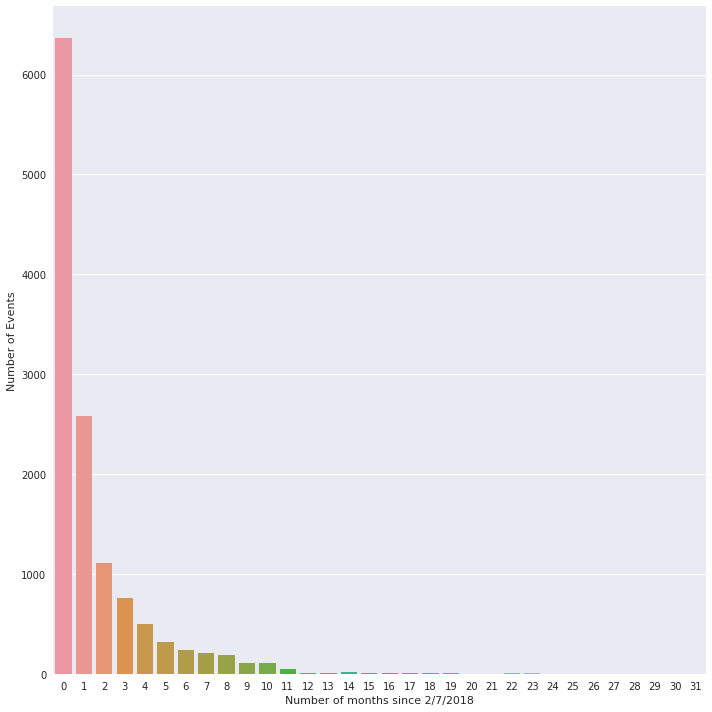

In [44]:
g = sns.factorplot(x=events_count.index, y='id', size=10, kind='bar', data=events_count)
g.set_ylabels('Number of Events')
g.set_xlabels('Number of months since 2/7/2018')
print()